# 第4章 ニューラルネットワークの学習

- ニューラルネットワークの学習がテーマ
- 学習とは，訓練データから最適な主にパラメータの値を自動で獲得すること
- 学習の目的は，損失関数を指標として導入し，その値が最小となる重みパラメータを探し出すこと
- 学習の手法として，勾配法とよばれる，関数の傾きを使った手法を使う

## 4.1 データから学習する
- ニューラルネットワークの特徴はデータから学習できること
- 学習するとは，重みパラメータの値をデータから自動で決定すること
- ここではPythonによってMNISTデータセットからの手書き数字の学習を実装する

### 4.1.1 データ駆動
- 機械学習はデータ駆動(data driven)によるアプローチ：人を中心とするアプローチからの脱却
    - データ駆動：計算機科学における計算モデルのひとつ．　データにより計算が駆動される．　
    - 計算モデル：計算・推論・証明といった行為を理論的・抽象的に考察するための数理モデル
    - 数理モデル：微分方程式など，数学の言葉で記述した系．時間変化する現象内の指標の動きを模倣する
- 何らかの問題解決の際，機械学習による手法では人の介入を極力避け，集められたデータから答えを見つけようと試みる
    - データの集め方が恣意的になる可能性もあるのでは？
    - ニューラルネットワークやディープラーニングは従来の機械学習で使われた手法以上に人の介入を遠ざけるという性質をもつ
- アルゴリズムをひねり出す代わりにデータを活用して解決する
    -　例えば，手書きの"5"という数字を正しく認識するための規則を考えるのは難しい
    - 一つの方法：データから抽出した特徴量と呼ばれる（通常はベクトル）データを識別器で学習させる
        - 有名な特徴量としてSIFT,SURF,HOG　があり，識別器としてSVMやKNNがある
        - このアプローチではデータの中から機械が規則性を見つけ出す．ゼロからアルゴリズムを考えるより効率的．
        - 特徴量は人が設計（選択）する必要がある
    - ニューラルネットワーク（ディープラーニング）による方法はデータをそのまま学習する
        - 特徴量に相当する部分も機械が学習する（end-to-end machine learning）
        - すべての問題を同じ流れで解くことができる

### 4.1.2 訓練データとテストデータ
- 機械学習におけるデータの取り扱いについての注意事項
    - データは訓練データ(教師データ)とテストデータの2つに分けて学習や実験を行うのが一般的
        - 学習したモデルの汎化能力（未知のデータに対する能力）を正しく評価するため
            - (例)　ハガキの郵便番号の自動読み取り：任意の人の任意の文字を読みとる能力を限られたデータで獲得したい
        - 分けないと正しい評価が下せず，　特定のデータセットしか対応できないことになる可能性が
            - 過学習(overfitting）: 特定のデータセットだけに過度に対応した状態．過学習を避けることは機械学習の一つの課題．       

## 4.2 損失関数

- ニューラルネットワークの学習では損失関数(loss function)と呼ばれる指標を基準として最適な重みパラメータの探索を行う
    - 損失関数は任意の関数を用いることができる
    - 一般には2条和誤差や交差エントロピー誤差などが用いられる
    - 損失関数は現在のニューラルネットワークが教師データに対してどれだけ適合していないかを表す

### 4.2.1 2乗和誤差(mean squared error)

$$E = \frac{1}{2}\sum_{k}(y_k - t_k)^2$$
ここで

- $y_k$ : ニューラルネットワークの出力
- $t_k$ : 教師データ
- $k$ : データの次元数

とする．
例として，次のような配列データを考える．　

In [1]:
import numpy as np

In [2]:
# yはニューラルネットワークの出力を表す
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
# t は教師データを表す．　正解を１とし，　それ以外を０とする表現を　one-hot　表現という．
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

ここで２乗和誤差を計算するための関数を導入する

In [3]:
# ２乗和誤差の実装
# yとt はNumpyの配列とする
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [4]:
mean_squared_error(np.array(y), np.array(t))

0.097500000000000031

In [5]:
# 先ほどの　y　のインデックス２の要素と７の要素とを入れ替えてみて，　再度実行
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.59750000000000003

以上の結果より，正解（2番）に近いニューラルネットの出力の方が２乗和誤差が小さくなることがわかる

### 4.2.2 交差エントロピー誤差(cross entropy error)

$$E = -\sum_k t_k \log y_k$$

ここで

- $\log$は底が$e$の自然対数$\log_e$を表す．
- $y_k$: ニューラルネットワークの出力
- $t_k$: 正解ラベル

とする．

$t_k$がone-hot表現のとき，交差エントロピー誤差は正解ラベルに対応するニューラルネット出力の自然対数を計算するだけになる

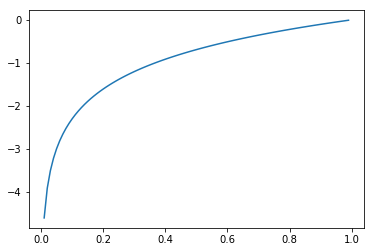

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
x = np.arange(0.01, 1, 0.01)
y = np.log(x)
plt.plot(x,y)

自然対数のグラフを見ると，$x$が１に近くにつれ$y$は０に近づく．$x$が０に近くにつれ$y$はどんどん小さくなる．
よって，交差エントロピー誤差は$x$が０に近く（確率が低くなる）につれどんどん大きくなる

In [7]:
# 交差エントロピー誤差の実装
# yとt はNumpyの配列とする
# log関数の入力が0にならないようにするため微小な値を加算している
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [8]:
# 実際に交差エントロピー誤差を計算して見る
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.51082545709933802

In [9]:
# yの2番要素と７番要素とを入れ替えて再度計算
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.3025840929945458

正解となるラベルの出力が大きい方が誤差が少なくなっていることがわかる

### 4.2.3 ミニバッチ学習

- 訓練データを使って学習するとは，訓練データに対する損失関数を求めてその値を小さくするようなパラメータを探すということ
- 損失関数は全ての訓練データを対象として求める必要がある．
    - １００個のデータがある場合は１００個の損失関数の和を指標とする
- 複数のデータの場合の交差エントロピー誤差は次のような式になる

$$E = -\frac{1}{N}\sum_n\sum_k t_{nk} \log y_{nk}$$

ここで

- N : データの個数
- $t_{nk}$ : 教師データ
    - $t_{nk}$の添字は$n$個目のデータの$k$次元目の値を表す
- $y_{nk}$ : ネットワークの出力（$n$個目のデータの$k$次元目の値）

#### この式の特徴
- １個の場合の損失関数の値を単純にN個に拡張したもの．
- 和を個数Nで割ることで正規化している(これは平均の損失関数を表す)
- 正規化することでデータ個数に寄らず同じ範囲の値となる

データ個数が多い場合の損失関数の計算を考える
- MNISTの場合，データが６００００個あるため，全てのデータを対象にして損失関数を計算して和を求めるのは時間がかかる
- ビックデータの場合，さらにデータの個数が多いケースも十分に考えられる
- したがって，全ての損失関数の和を求めるのは現実的ではないため，**ミニバッチ学習**を行い，その値を全体の近似として利用する

#### ミニバッチ学習
- データ全体を使って学習するのではなく，無作為に選び出した一部のデータ（ミニバッチ）を用いて学習を行う学習手法

In [10]:
#
# MNISTデータ読み込み
#
import os, sys
sys.path.append(os.pardir)   # 親ディレクトリをモジュール探索パスに追加
import numpy as np
from dataset.mnist import load_mnist

# MNISTデータセットの読み込み(*_train : 訓練用，　*_test : 評価用)

# one-shot 表現
(x_train_oneshot, t_train_oneshot), (x_test_oneshot, t_test_oneshot) = load_mnist(normalize=True, one_hot_label=True)
print("one shot label:\n")
print("x_train_oneshot.shape = " + str(x_train_oneshot.shape))
print("t_train_oneshot.shape = " + str(t_train_oneshot.shape))
print("x_test_oneshot.shape = " + str(x_test_oneshot.shape))
print("t_test_oneshot.shape = " + str(t_test_oneshot.shape))
print("")
print("type(x_train_oneshot) = " + str(type(x_train_oneshot)))
print("type(t_train_oneshot) = " + str(type(t_train_oneshot)))
print("type(x_test_oneshot) = " + str(type(x_test_oneshot)))
print("type(t_test_oneshot) = " + str(type(t_test_oneshot)))
print("")

# 通常ラベル
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)
print("normal label:\n")
print("x_train.shape = " + str(x_train.shape))
print("t_train.shape = " + str(t_train.shape))
print("x_test.shape = " + str(x_test.shape))
print("t_test.shape = " + str(t_test.shape))
print("")
print("type(x_train) = " + str(type(x_train)))
print("type(t_train) = " + str(type(t_train)))
print("type(x_test) = " + str(type(x_test)))
print("type(t_test) = " + str(type(t_test)))

one shot label:

x_train_oneshot.shape = (60000, 784)
t_train_oneshot.shape = (60000, 10)
x_test_oneshot.shape = (10000, 784)
t_test_oneshot.shape = (10000, 10)

type(x_train_oneshot) = <class 'numpy.ndarray'>
type(t_train_oneshot) = <class 'numpy.ndarray'>
type(x_test_oneshot) = <class 'numpy.ndarray'>
type(t_test_oneshot) = <class 'numpy.ndarray'>

normal label:

x_train.shape = (60000, 784)
t_train.shape = (60000,)
x_test.shape = (10000, 784)
t_test.shape = (10000,)

type(x_train) = <class 'numpy.ndarray'>
type(t_train) = <class 'numpy.ndarray'>
type(x_test) = <class 'numpy.ndarray'>
type(t_test) = <class 'numpy.ndarray'>


In [11]:
# ミニバッチを取り出す（ランダムにデータを選択する）コード
train_size = x_train.shape[0]
batch_size = 10

# 指定された数値のなかからランダムに好きな数値だけ取り出す
# この場合，０以上train_size未満の数値のなかからランダムにbatch_size個の数字を選び出す
batch_mask = np.random.choice(train_size, batch_size)

x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]
t_batch_oneshot = t_train_oneshot[batch_mask]

print("train_size = " + str(train_size))
print("batch_mask = " + str(batch_mask))
print("")
print("x_batch.shape = " + str(x_batch.shape))
print("x_batch = " + str(x_batch))
print("")
print("t_batch.shape = " + str(t_batch.shape))
print("t_batch = " + str(t_batch))
print("")
print("t_batch_ontshot.shape = " + str(t_batch_oneshot.shape))
print("t_batch_ontshot = \n" + str(t_batch_oneshot))

train_size = 60000
batch_mask = [ 3487 59073  5457  7468  2779 12991 52818  6668 14966 47650]

x_batch.shape = (10, 784)
x_batch = [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]

t_batch.shape = (10,)
t_batch = [1 6 9 9 9 4 3 9 4 2]

t_batch_ontshot.shape = (10, 10)
t_batch_ontshot = 
[[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]]


### 4.2.4 [バッチ対応版]交差エントロピー誤差の実装



In [33]:
# 交差エントロピー誤差の実装（バッチ対応版）
# yとt はNumpyの配列とする
def cross_entropy_error(y, t):
    # 次元が１(つまりデータの個数が1)の場合
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y)) / batch_size

In [13]:
# データ数が1の時のreshape の確認
y = np.array([1,3,5])
print("y.shape = " + str(y.shape))
y = y.reshape(1, y.size)
print("y.shape(resized) = " + str(y.shape))

y.shape = (3,)
y.shape(resized) = (1, 3)


In [41]:
# 交差エントロピー誤差の実装（バッチ対応版．教師データがone-hot表現ではなくラベルとして与えられた場合）
# yとt はNumpyの配列とする
def cross_entropy_error(y, t):
    # 次元が１の場合
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    # NumPy多次元配列のインデックス参照を用いてアクセスしていることに注意
    return -np.sum(t * np.log(y[np.arange(batch_size), t])) / batch_size

In [14]:
# NumPy配列が多重配列の場合の，インデックス参照
batch_size = 5
print(np.arange(batch_size))
y = np.array([[0.1, 0.05], [0.6, 0.0], [0.05, 0.1], [0.0, 0.1], [0.0, 0.0]])
t = [2,7,0,9,4]
print(type(np.arange(batch_size)))
print("y[2,1] = " + str(y[2,1]))

[0 1 2 3 4]
<class 'numpy.ndarray'>
y[2,1] = 0.1


In [15]:
# 2つの同じサイズのNumPy配列を使ってインデックス参照し，計算結果をNumPy配列として得る
a = np.array([0, 1, 2, 3, 4])
b = np.array([2, 7, 0, 9, 4])
delta = 1e-7
# これは　x_train[0,2], x_train[1,7],　x_train[2,0], x_train[3,9], x_train[4,4]　をlogに入力していることになる
np.log(x_train[a, b] + delta)

array([-16.1180954, -16.1180954, -16.1180954, -16.1180954, -16.1180954], dtype=float32)

### 4.2.5 なぜ損失関数を設定するのか？

- 最適なパラメータを探し出す方法とは，よりよい結果が出る方向へパラメータを徐々に更新させてゆくこと
    - 評価関数をパラメータで微分し，傾きがマイナスならプラス方向へ，プラスならマイナス方向へパラメータを変化させる
- ポイント
    - 結果が「よりよい」かどうかが判断できなくてはならない
    - 値を更新させることができなければならない
        - パラメータの変化に応じて関数の値が変化しなければならない（そうでないと更新できない）
- 以上の観点で検討すると
    - 認識精度を指標にすると，パラメータの微分がほとんどの場所で0になってしまう
        - パラメータの微小な変化では認識精度がほとんど変化しない．しても非連続的に変化する
        - 損失関数はパラメータの変化に応じて連続的に変化する
    - 活性化関数をステップ関数にすると，微分がほぼ全域で0になる
        - パラメータが変化をステップ関数が消してしまうため，関数に反映されない
        - シグモイド関数はパラメータの変化に対して常に連続的に変化する（しかも単調増加）

## 4.3 数値微分

### 4.3.1 微分

微分とは,ある瞬間の変化量を表したもの

$$\frac{df(x)}{dx} = \lim_{h\rightarrow 0} \frac{f(x+h)-f(x)}{h}$$

#### 関数の微分を計算する際の注意

- 丸め誤差(rounding error)：小さすぎる値を使用することで，数値が省略された結果生じる誤差
    - 微小間隔として$10^{-4}$程度の値を使う
- 差分の計算において，間隔を無限小にすることができないために誤差が生じる
    - $\frac{df(x)}{dx} と　\frac{f(x+h)-f(x)}{h}$はhを無限小にできないため，異なる値となる

In [16]:
# 丸め誤差の例．　実際は0ではないのに結果は0となる
np.float32(1e-50)

0.0

#### 誤差を減らすための工夫

- 中心差分：x を中心としてその前後の差分を計算する
    - 前方差分　$\frac{f(x+h)-f(x)}{h}$ の代わりに，中心差分として例えば　$\frac{f(x+\frac{h}{2})-f(x-\frac{h}{2})}{h}$　を使う

In [17]:
# 中心差分による数値微分の実装
# f　は関数，　xは関数fのパラメータ
def numerical_diff(f, x):
    h = 1e-4
    return ((f(x+h) - f(x-h)) / (2 * h) )

### 4.3.2 数値微分の例

次の関数を数値微分してみる
$$y = 0.01x^2 + 0.1x$$

In [18]:
# 微分対象となる関数の実装
def function_1(x):
    return 0.01 * x**2 + 0.1 * x

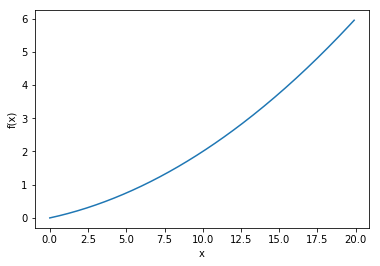

In [19]:
# 関数の描画
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

f'(5) = 0.1999999999990898
f'(10) = 0.2999999999986347


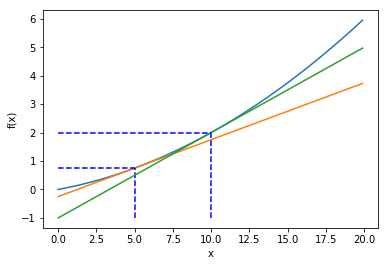

In [20]:
#　関数を微分してみる
df5 = numerical_diff(function_1, 5)
df10 = numerical_diff(function_1, 10)
print("f'(5) = " + str(df5))
print("f'(10) = " + str(df10))

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)

fdf5 = df5 * (x-5) + function_1(5)
plt.plot(x, fdf5)
# (5, function_1(5)) と　(0, function_1(5)) とを結ぶ青い破線をプロット
plt.plot([0,5], [function_1(5), function_1(5)], '--b')
# (5, function_1(5)) と　(5, 0) とを結ぶ青い破線をプロット
plt.plot([5, 5], [-1, function_1(5)], '--b')

fdf10 = df10 * (x-10) + function_1(10)
plt.plot(x, fdf10)
# (10, function_1(10)) と　(0, function_1(10)) とを結ぶ青い破線をプロット
plt.plot([0,10], [function_1(10), function_1(10)], '--b')
# (10, function_1(10)) と　(10, 0) とを結ぶ青い破線をプロット
plt.plot([10, 10], [-1, function_1(10)], '--b')

plt.show()


### 4.3.3 偏微分

次の式を考える
$$f(x_0, x_1) = x_0^2 + x_1^2$$

In [21]:
def function_2(x):
    return x[0]**2 + x[1]**2

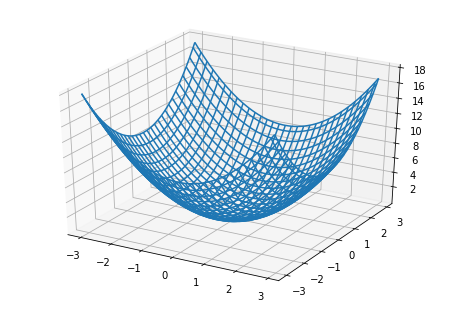

In [22]:
# function_2 をグラフに描画する
from mpl_toolkits.mplot3d import Axes3D

x = [np.arange(-3, 3, 0.1), np.arange(-3,3, 0.1)]
X, Y = np.meshgrid(x[0], x[1])
Z = function_2([X, Y])

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X,Y,Z)

plt.show()

2つ以上の変数からなる関数の場合は，数値微分を考える際にどの変数に対する微分かを区別する必要がある

#### 偏微分
- 複数の変数からなる関数の微分
- 数式で表すと$\frac{\partial f}{\partial x_0}$,$\frac{\partial f}{\partial x_1}$の様に書く

#### 偏微分を計算してみる
- 偏微分は，1変数の微分と同じである場所の傾きを求める
- 偏微分の場合，複数ある変数の中で対象とする変数を1つに絞り，他の変数はある値に固定する

In [23]:
# x0 = 3, x1 = 4 のときの　x0　に対する偏微分

def function_tmp1(x0):
    return x0 * x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [24]:
# x0 = 3, x1 = 4 のときの　x1　に対する偏微分

def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

## 4.4 勾配

1変数ずつ行なっていた偏微分の計算を一つにまとめて$(\frac{\partial f}{\partial x_0}, \frac{\partial f}{\partial x_1})$の形に（勾配：gradientという）まとめる

In [25]:
# 勾配計算の実装
# f: 関数，　x：　パラメータ（配列）
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.shape[0]):
        # 元の値を一時退避
        tmp_val = x[idx]
        
        # f(x+h) の計算
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h) の計算
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        #　勾配の算出（中心差分）
        grad[idx] = (fxh1 - fxh2) / (2 * h)
        
        # 退避していた値を戻す
        x[idx] = tmp_val  
    return grad

# 実行結果
print("gradient of function_2 at (3.0, 4.0) = " + str(numerical_gradient(function_2, np.array([3.0, 4.0]))))
print("gradient of function_2 at (0.0, 2.0) = " + str(numerical_gradient(function_2, np.array([0.0, 2.0]))))
print("gradient of function_2 at (3.0, 0.0) = " + str(numerical_gradient(function_2, np.array([3.0, 0.0]))))

gradient of function_2 at (3.0, 4.0) = [ 6.  8.]
gradient of function_2 at (0.0, 2.0) = [ 0.  4.]
gradient of function_2 at (3.0, 0.0) = [ 6.  0.]


In [26]:
x = np.array([1, 2])
x.size

2

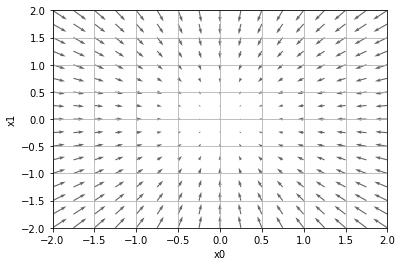

In [27]:
# 勾配をグラフに図示
x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2,2.5, 0.25)
X, Y = np.meshgrid(x0, x1)

X = X.flatten()
Y = Y.flatten()

grad = numerical_gradient(function_2, np.array([X, Y]))
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")

plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.draw()
plt.show()

この図が示すこと

- この図は各点における勾配を矢印で表現したものである
- 矢印は各地点において低くなる方向を指す
    - 一番低い地点を指すとは限らない
- 一番低い場所から離れるほど矢印の大きさも大きくなる
- 勾配が示す方向は各場所において関数の値を最も減らす方向を指す

### 4.4.1 勾配法

勾配を利用して関数の最小値を探すための方法

注意点
- 勾配が指す先が本当に進むべき方向かどうか，また関数の最小値かどうか，の保証がない

方法
- 現在の場所から勾配方向に一定距離だけ進む
- 移動した先で勾配を求め，またその勾配方向へ進む
- 最小と思われる場所でなければ，最初に戻る

#### 勾配法の数式表現

$$x_0 = x_0 - \eta\frac{\partial f}{\partial x_0} $$
$$x_1 = x_1 - \eta\frac{\partial f}{\partial x_1} $$

ここで，$\eta$は学習率(learning rate)と呼ばれ，更新の量を示す
- 学習率は0.01や0.001などあらかじめ決めておく必要がある
- 学習率は大きすぎても小さすぎてもダメ．いろいろ変更しながら確認作業を行うのが一般的

In [28]:
# 勾配法の実装
# f: 最適化対象の関数
# init_x: 初期値
# lr: 学習率
# step_num: 繰り返しの数
# 返値：　最小となる点の座標（リスト），　および初期値から勾配に沿って移動した点の履歴（NumPy配列）
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []
    
    for i in range(step_num):
        # 履歴を保存する(xはこの後に更新されるため，　x.copyで明示的にコピーを作って保存する)
        x_history.append(x.copy())
        
        grad = numerical_gradient(f, x)
        x -= lr * grad
        
    return x, np.array(x_history)

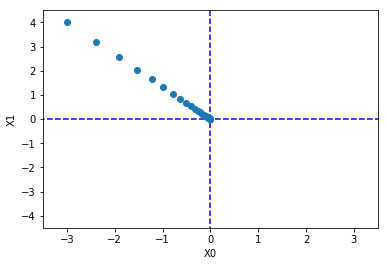

[ -6.11110793e-10   8.14814391e-10]


In [29]:
# function_2 の最小値を勾配法で求めてみる
init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

# (-5, 0) と　(5, 0) とを結ぶ青い破線をプロット
plt.plot([-5, 5], [0, 0], '--b')
# (0, -5) と　(0, 5) とを結ぶ青い破線をプロット
plt.plot([0, 0], [-5, 5], '--b')
# 点の移動履歴を表す点群をプロット
plt.plot(x_history[:, 0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()
print(x)

#### ハイパーパラメータ

- 人手で設定されるパラメータのこと（例：学習率）
    - 重みやバイアスのようなパラメータは学習アルゴリズムで自動的に決定される
- 一般にはハイパーパラメータを色々変えて試しながら学習できるケースを探す作業が必要になる

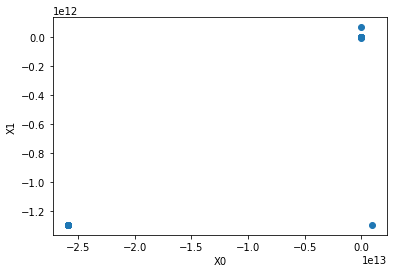

[ -2.58983747e+13  -1.29524862e+12]


In [30]:
# 学習率が大きすぎる例(lr=10)
init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(function_2, init_x=init_x, lr=10, step_num=50)

# (-5, 0) と　(5, 0) とを結ぶ青い破線をプロット
plt.plot([-5, 5], [0, 0], '--b')
# (0, -5) と　(0, 5) とを結ぶ青い破線をプロット
plt.plot([0, 0], [-5, 5], '--b')
# 点の移動履歴を表す点群をプロット
plt.plot(x_history[:, 0], x_history[:,1], 'o')

plt.xlabel("X0")
plt.ylabel("X1")
plt.show()
print(x)

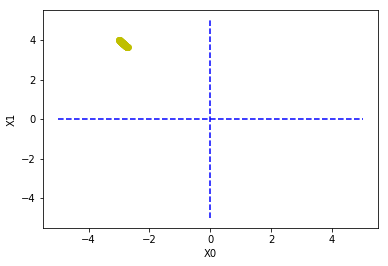

[-2.71424045  3.61898727]


In [31]:
# 学習率が小さすぎる例
init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(function_2, init_x=init_x, lr=1e-3, step_num=50)

# (-5, 0) と　(5, 0) とを結ぶ青い破線をプロット
plt.plot([-5, 5], [0, 0], '--b')
# (0, -5) と　(0, 5) とを結ぶ青い破線をプロット
plt.plot([0, 0], [-5, 5], '--b')
# 点の移動履歴を表す点群をプロット
plt.plot(x_history[:, 0], x_history[:,1], 'yo')

plt.xlabel("X0")
plt.ylabel("X1")
plt.show()
print(x)

### 4.4.2 ニューラルネットワークに対する勾配

ニューラルネットワークに対する勾配を計算する．

形状が$2 \times 3$の重み$\bf W$をもつニューラルネットワークがあり，その損失関数を$L$とすると重みパラメータおよび勾配は次の様に表現される

$${\bf W} = 
 \left(
    \begin{array}{ccc}
      w_{11} & w_{21} & w_{31} \\
      w_{12} & w_{22} & w_{32}
    \end{array}
  \right)
$$

$$\frac{\partial L}{\partial {\bf W}} = 
 \left(
    \begin{array}{ccc}
      \frac{\partial L}{\partial w_{11}} & \frac{\partial L}{\partial w_{21}} & \frac{\partial L}{\partial w_{31}} \\
      \frac{\partial L}{\partial w_{12}} & \frac{\partial L}{\partial w_{22}} & \frac{\partial L}{\partial w_{32}}
    \end{array}
  \right)
$$

特徴
- $\frac{\partial L}{\partial {\bf W}}$の各要素はそれぞれの要素に対する偏微分から構成される．
- $\frac{\partial L}{\partial {\bf W}}$の形状は元の${\bf W}$と同じ$2 \times 3$となる


In [30]:
# ソフトマックス関数(再掲)
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 
    
    x = x - np.max(x) # オーバーフロー対策
    return np.exp(x) / np.sum(np.exp(x))

In [31]:
# ニューラルネットワークの勾配を求めてみる
import sys, os
sys.path.append(os.pardir)
import numpy as np

class simpleNet:
    def __init__(self):
        # randn 関数は標準正規分布の配列（この場合は2x3の配列）を生成する．以下を参照
        # https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randn.html#numpy.random.randn
        self.W = np.random.randn(2,3)
    
    # 順方向伝播(forward propagation)
    def predict(self, x):
        return np.dot(x, self.W)
    
    # 損失関数
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [36]:
# simpleNetクラスの生成．重みパラメータを自動生成
net = simpleNet()
print("net.W = \n" + str(net.W) + "\n")

# 　ニューラルネットへの入力　x
x = np.array([0.6, 0.9])

# 入力から順方向伝播による出力pを得る
p = net.predict(x)
print("p = " + str(p))

# 出力を活性化関数に入力
print("np.argmax(p) = " + str(np.argmax(p)))

# 正解ラベル
t = np.array([0,0,1])

# 損失関数の評価
print("net.loss(x, t) = " + str(net.loss(x, t)) + "\n")

# 勾配の計算.numerical_gradientに渡すための関数を定義する
def f(W):
    return net.loss(x, t)

#dW = numerical_gradient(lambda w: net.loss(x,t), net.W)
dW = numerical_gradient(f, net.W)
print("dW = \n" + str(dW))

net.W = 
[[-1.00516303 -0.71492906  0.15968291]
 [-0.39209924 -0.57692989 -1.22176703]]

p = [-0.95598713 -0.94819434 -1.00378058]
np.argmax(p) = 1
net.loss(x, t) = 1.13337247731

dW = 
[[ 0.20262371  0.20420889 -0.4068326 ]
 [ 0.30393557  0.30631333 -0.6102489 ]]


上のコードで計算したdWの値をみると，同じ行の要素が全て同じ値になっているのがわかる．
これは以前に定義したnumerical_gradient関数が多次元配列に対応していないため．

なので，下の多次元配列に対応したnumerical_gradientを実行したのちに，再度上のプログラムを実行してdWの値を確認してみる．

In [35]:
# 多次元配列に対応した numerical_gradient 関数
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    #　多次元配列に対応するため，NumPyで提供されるnditerというイテレータオブジェクトを使用する
    # https://docs.scipy.org/doc/numpy/reference/arrays.nditer.html
    # https://docs.scipy.org/doc/numpy/reference/generated/numpy.nditer.html#numpy.nditer
    # multi_index は多重インデックスに対応する
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        # インデックスの取得（多次元配列に対応したインデックスの組が得られる）
        idx = it.multi_index
        # print("idx = " + str(idx))
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 値を元に戻す
        
        # 次の繰り返しが存在するかどうかの確認
        it.iternext()   
        
    return grad

####　重み行列に対する勾配の計算でわかること

- 配列の次元は変わらない
- 勾配の行列dWの各要素は，重みを一定量変化させた時の損失関数の変化量を示す．
    - 例えば$\frac{\partial L}{\partial w_{11}}$が0.2のとき，$w_{11}$を$h$だけ増やすと損失関数は$0.2h$だけ増加するという意味になる
    - 勾配の要素の値が大きいほど更新の度合いに寄与する割合が高い    

## 4.5 学習アルゴリズムの実装

#### ニューラルネットワークの学習手順（確率的勾配降下法, stochastic gradient descent, SGD）

目的
- ある重みとバイアスを持ったニューラルネットが存在し，学習で重みとバイアスとを学習（データに合わせた調整）させる．

手順
1. 訓練データの中から無作為にミニバッチを選び出す
    - 無作為に選び出している点が「確率的」という名称の由来となっている
2. 各重みパラメータの勾配を求める
3. 重みパラメータを勾配方向に微小量だけ更新する
4. ステップ1から3を繰り返す
    - 繰り返しの終了条件が書いていないが，ここでは触れない


### 4.5.1 2層ニューラルネットワークのクラス

ニューラルネットワークをクラス（TwoLayerNet）として実装する

In [40]:
# sigmoid 関数（第３章より）
def sigmoid(x):
    return 1 / (1 + np.exp(-x))   

In [46]:
# gradient 関数を使う場合に必要なので，ここで用意しておく（説明は次章）
def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

In [41]:
# coding: utf-8

class TwoLayerNet:
    # コンストラクタ
    # input_size :  入力層のデータ個数
    # hidden_size: 隠れ層のニューロンの個数
    # output_size : 出力層のデータ個数
    # weight_init_std : 重みの初期値に掛け合わせる係数
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    # forward propagation
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # loss funtion
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    # 成功率の計算
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    #　勾配の計算
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    #  勾配の計算（高速版，次章で扱う）
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [42]:
# 使用例
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print("W1.shape = " + str(net.params['W1'].shape))
print("b1.shape = " + str(net.params['b1'].shape))
print("W2.shape = " + str(net.params['W2'].shape))
print("b2.shape = " + str(net.params['b2'].shape))

W1.shape = (784, 100)
b1.shape = (100,)
W2.shape = (100, 10)
b2.shape = (10,)


In [43]:
# ダミーの入力データ
x = np.random.rand(100, 784)
#  ダミーの正解ラベル
t = np.random.rand(100, 10)

#　推論処理
y = net.predict(x)
grads = net.numerical_gradient(x, t)
print("W1.shape = " + str(grads['W1'].shape))
print("b1.shape = " + str(grads['b1'].shape))
print("W2.shape = " + str(grads['W2'].shape))
print("b2.shape = " + str(grads['b2'].shape))

W1.shape = (784, 100)
b1.shape = (100,)
W2.shape = (100, 10)
b2.shape = (10,)


### 4.5.2 ミニバッチ学習の実装

おさらい
- ニューラルネットワークの学習の実装はミニバッチ学習で行う
    - ミニバッチ学習とは，無作為に取り出した一部のデータを対象に勾配法を使って重みパラメータを更新すること

ここでは，MNISTデータセットを使って学習を行う

- ミニバッチのサイズを100として，60000個のデータから100個をランダムに抜き出して学習する．
- 学習の繰り返し回数を10000回繰り返す．

In [47]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# ハイパーパラメータ
iters_num = 10000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 100 # ミニバッチのサイズ
learning_rate = 0.1 # 学習率

# 学習履歴
train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1エポックあたりの繰り返し数
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 0から59999の数値からランダムに100個を抽出
    batch_mask = np.random.choice(train_size, batch_size)
    # ミニバッチの入力データと正解ラベルを取得
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算（network.gradientは次章で扱う）
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 損失関数を呼び出して交差エントロピー誤差を計算
    loss = network.loss(x_batch, t_batch)
    # 履歴として保存しておく
    train_loss_list.append(loss)
    
    # 訓練データおよびテストデータに対する認識精度の計算
    # 1エポック600回なので10000回繰り返す場合は17回ほど計算することになる
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.0973666666667, 0.0982
train acc, test acc | 0.793133333333, 0.7994
train acc, test acc | 0.877016666667, 0.8827
train acc, test acc | 0.900683333333, 0.9034
train acc, test acc | 0.907866666667, 0.9112
train acc, test acc | 0.915083333333, 0.9179
train acc, test acc | 0.920116666667, 0.9228
train acc, test acc | 0.924983333333, 0.9257
train acc, test acc | 0.928633333333, 0.9306
train acc, test acc | 0.9314, 0.9325
train acc, test acc | 0.934333333333, 0.9352
train acc, test acc | 0.936966666667, 0.9378
train acc, test acc | 0.939283333333, 0.9392
train acc, test acc | 0.940866666667, 0.9409
train acc, test acc | 0.942933333333, 0.9416
train acc, test acc | 0.94535, 0.944
train acc, test acc | 0.94745, 0.945


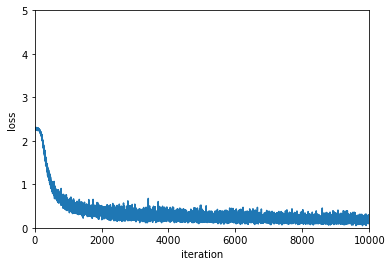

In [48]:
# 損失関数の推移をグラフに描画して，徐々に下がっていくことを確認
x = np.arange(iters_num)
plt.plot(x, train_loss_list)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.xlim(0, 10000)
plt.ylim(0, 5)
plt.show()

### 4.5.3 テストデータで評価

- 訓練データに対して学習がうまくいっていることは確認できた
- 他のデータセットにも同じ程度の実力を発揮できるかどうかは不明
- 訓練データ以外のデータに対しても識別がうまくいくことを確認する必要がある
    - 識別できる様であれば，汎化能力があると見做すことができる
    - 訓練データは識別できるが，それ以外のデータが識別できなければ「過学習」を起こしていることになる
- 実装では，定期的に訓練データとテストデータとを対象に認識精度を記録する
    - ここでは 60000/100 = 600回に1回記録を行う．繰り返し回数10000回では17回ほど計算することになる
    - 600回繰り返すと，60000個のデータを全て見たことになる．この回数を**エポック(epoch)**という

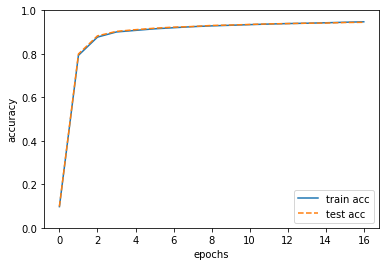

In [49]:
# 認識精度の推移をグラフに描画し，認識精度が上がっていることを確認
# 計算自体は先のプログラムで行なっているため，ここではプロットのみ
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

##### 確認

ここでは認識精度に差がないため，汎化能力を有し，過学習が起きていないことが確認できた

## 4.6 まとめ

- テーマ：ニューラルネットワークの学習について
- 損失関数
    - 学習のための指標として損失関数を導入した．
        - 損失関数として2乗和誤差や交差エントロピー誤差がある．
    - 学習の目標は損失関数の値がもっとも小さくなる重みパラメータを探し出すことである
- 勾配法
    - 損失関数の最小値を探し出す手法として勾配法がある． 勾配法は関数の傾きを使った手法である．
    - 学習は損失関数の値が小さくなるように重みパラメータを更新する
    - 重みパラメータの更新には，重みパラメータの勾配を利用し，勾配方向に重みの値を更新する作業を繰り返す
- 数値微分
    - 重みパラメータの勾配を求めるために数値微分を行う
    - 数値微分とは，微小な値を与えた時の差分によって微分を求めることである
    - 数値微分による計算は実装は簡単だが時間がかかる．　　
- 学習
    - 確率的勾配降下法を呼ばれる学習方法を用いた
    - 学習は全データセットの一部を取り出して行うミニバッチ学習で行う
    - データセットは，訓練データ（教師データ）とテストデータに分けて使用する
        - 訓練データで学習を行い，　モデルの汎化能力をテストデータで評価する
- 次章では高速に勾配を求めるための手法として誤差逆伝搬法を扱う．